# Projeto em Marketing Digital I
---

In [34]:
import pandas as pd

In [35]:
dataset = pd.read_csv('/home/jdspy/Documentos/arquivados/datasets/data.csv')

In [36]:
dataset.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [37]:
dataset.shape

(12283, 12)

In [38]:
len(dataset['fullVisitorId'].unique())

9996

In [39]:
dataset.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [40]:
from datetime import datetime

def handle_date_variable_please(number_date):
    string_date = str(number_date)
    
    year = int(string_date[0:4])
    month = int(string_date[4:6])
    day = int(string_date[6:])
    
    return datetime(year, month, day)

In [41]:
dataset['date'] = dataset['date'].apply(handle_date_variable_please)

In [42]:
dataset['fullVisitorId'] = dataset['fullVisitorId'].astype(str)

In [43]:
dataset['visitId'] = dataset['visitId'].astype(str)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channelGrouping       12283 non-null  object        
 1   date                  12283 non-null  datetime64[ns]
 2   device                12283 non-null  object        
 3   fullVisitorId         12283 non-null  object        
 4   geoNetwork            12283 non-null  object        
 5   sessionId             12283 non-null  object        
 6   socialEngagementType  12283 non-null  object        
 7   totals                12283 non-null  object        
 8   trafficSource         12283 non-null  object        
 9   visitId               12283 non-null  object        
 10  visitNumber           12283 non-null  int64         
 11  visitStartTime        12283 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.1+ MB


In [45]:
import json

json_columns = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [46]:
for column in json_columns:
    device_dataset = pd.DataFrame([json.loads(x) for x in dataset[column]])
    dataset = dataset.join(device_dataset)

In [47]:
dataset.drop(json_columns, axis=1, inplace=True)

In [49]:
dataset.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [60]:
dataset.drop(['adwordsClickInfo'], axis=1, inplace=True)

In [73]:
valores_unicos = pd.Series()
for column in dataset.columns:
    valores_unicos[column] = len(dataset[column].unique())

/tmp/ipykernel_2865/2781707962.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  valores_unicos = pd.Series()


In [70]:
dataset = dataset[dataset.columns[valores_unicos > 1]]

In [71]:
dataset

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,2017-01-04,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,...,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1,1,NaN
12279,Social,2017-01-04,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12280,Social,2017-01-04,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12281,Social,2017-01-04,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,...,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,NaN


In [81]:
(dataset.isna().sum() / len(dataset)) * 100

channelGrouping        0.000000
date                   0.000000
fullVisitorId          0.000000
sessionId              0.000000
visitId                0.000000
visitNumber            0.000000
visitStartTime         0.000000
browser                0.000000
operatingSystem        0.000000
isMobile               0.000000
deviceCategory         0.000000
continent              0.000000
subContinent           0.000000
country                0.000000
region                 0.000000
metro                  0.000000
city                   0.000000
networkDomain          0.000000
campaign               0.000000
source                 0.000000
medium                 0.000000
keyword               56.085647
isTrueDirect          68.370919
referralPath          63.445412
adContent             98.811365
campaignCode          99.991859
hits                   0.000000
pageviews              0.000000
bounces               49.751689
newVisits             23.105105
transactionRevenue    98.664821
dtype: f

In [82]:
variaveis_quantitivas = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

for variavel in variaveis_quantitivas:
    dataset[variavel] = pd.to_numeric(dataset[variavel])

/tmp/ipykernel_2865/2033513151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[variavel] = pd.to_numeric(dataset[variavel])


In [83]:
dataset

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,2017-01-04,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,...,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1.0,1.0,NaN
12279,Social,2017-01-04,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,NaN
12280,Social,2017-01-04,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,NaN
12281,Social,2017-01-04,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,...,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,NaN


In [86]:
pd.value_counts(dataset['transactionRevenue'])

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
              ..
22490000.0     1
74850000.0     1
32490000.0     1
239880000.0    1
25240000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [89]:
dataset['transactionRevenue'].isna().sum() / len(dataset)

0.9866482129772857

In [91]:
dataset['transactionRevenue'] = dataset['transactionRevenue'].fillna(0)

/tmp/ipykernel_2865/2759746525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['transactionRevenue'] = dataset['transactionRevenue'].fillna(0)


In [97]:
dataset['transactionRevenue'] = dataset['transactionRevenue'] / (10 ** 6)

/tmp/ipykernel_2865/3888796624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['transactionRevenue'] = dataset['transactionRevenue'] / (10 ** 6)


In [99]:
pd.value_counts(dataset['transactionRevenue'])

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

In [103]:
dataset_quant = dataset.groupby(by='fullVisitorId')[variaveis_quantitivas].sum()

In [106]:
dataset_quant = dataset_quant.reset_index()

In [107]:
dataset_quant

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,1001067685422494805,0.0,5,1.0,4,0.0
1,1003523566740820290,0.0,10,1.0,8,0.0
2,100486777854209707,1.0,1,1.0,1,0.0
3,100499525376508200,0.0,5,1.0,4,0.0
4,1006478873566458017,0.0,4,1.0,4,0.0
...,...,...,...,...,...,...
9991,9996691020299725061,0.0,10,0.0,10,0.0
9992,9996793353803109760,1.0,1,1.0,1,0.0
9993,9997125062030599880,0.0,8,1.0,8,0.0
9994,9997464307347866920,1.0,1,1.0,1,0.0


In [137]:
x = dataset_quant.drop(['transactionRevenue'], axis=1)
y = dataset_quant['transactionRevenue']

In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.25)

In [139]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [140]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [141]:
y_pred = linear_regression.predict(x_test)

In [142]:
linear_regression.score(x_test, y_test)

-0.0004721154223854551

In [143]:
from sklearn import metrics

In [144]:
metrics.r2_score(y_pred, y_test)

-9259.96056347339

In [145]:
metrics.mean_absolute_error(y_pred, y_test)

3.355526403275845

In [146]:
resultados = pd.DataFrame()

In [151]:
resultados['y_true'] = y_test
resultados['y_pred'] = y_pred
resultados['erro'] = y_pred - y_test

In [152]:
resultados

,y_true,y_pred,erro
5891,0.0,1.394752,1.394752
898,0.0,1.921869,1.921869
6148,0.0,1.375851,1.375851
5325,0.0,1.434449,1.434449
7978,0.0,1.227880,1.227880
...,...,...,...
5847,0.0,1.398110,1.398110
8379,0.0,1.937900,1.937900
3199,0.0,1.601313,1.601313
6094,0.0,1.932393,1.932393


In [153]:
resultados.query('y_true > 0')

,y_true,y_pred,erro
6346,127.16,1.880038,-125.279962
3725,114.65,1.561118,-113.088882
377,278.03,1.926247,-276.103753
1109,9.16,1.761201,-7.398799
693,9.98,1.794605,-8.185395
...,...,...,...
3772,32.94,1.557566,-31.382434
5756,55.99,1.884661,-54.105339
341,7.99,1.822841,-6.167159
4896,14.48,1.468223,-13.011777


In [154]:
import seaborn as sns

<AxesSubplot:xlabel='y_true', ylabel='erro'>

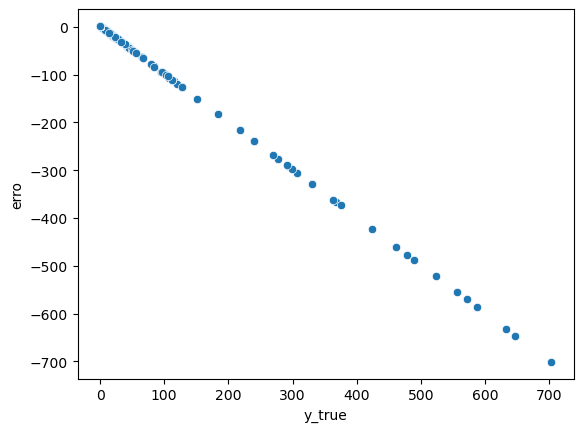

In [156]:
sns.scatterplot(x='y_true', y='erro', data = resultados)

In [159]:
import numpy as np

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

25.57031023407038

In [168]:
visitas = dataset.groupby('fullVisitorId', as_index=False)

In [171]:
visitas['visitNumber'].max()

,fullVisitorId,visitNumber
0,1001067685422494805,1
1,1003523566740820290,1
2,100486777854209707,1
3,100499525376508200,1
4,1006478873566458017,1
...,...,...
9991,9996691020299725061,3
9992,9996793353803109760,1
9993,9997125062030599880,1
9994,9997464307347866920,1
